In [ ]:
import pandas as pd
import numpy as np
data = pd.read_excel("/content/241126_최근5년_KBO 신인 드래프트.xlsx", sheet_name = "2020-2025_pitcher")
data.head(10)

,player_id,game_tag,평균자책점,경기수,승,패,이닝,타자,피안타,피홈런,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1,김진욱_주말리그_전반기,0.00,1,0,0.0,1.2,6,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,김진욱_황금사자기,1.59,3,2,1.0,17.1,65,12.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,김진욱_주말리그_후반기,5.40,2,1,0.0,4.2,20,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,김진욱_대통령배,0.69,4,1,0.0,13.0,47,3.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,이믿음_KUSF 대학야구 U-리그,2.57,6,1,0.0,6.2,28,5.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,이믿음_전국대학야구선수권대회,4.50,4,0,0.0,8.0,32,6.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,이믿음_KUSF 대학야구 U-리그 왕중왕전,1.13,3,1,0.0,8.0,31,5.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,이병준_주말리그_전반기,0.00,1,1,0.0,2.1,7,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,이병준_청룡기,1.00,1,0,0.0,0.2,5,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3,이병준_주말리그_후반기,2.70,4,0,0.0,9.2,54,6.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(1359, 32)

## 키/몸무게 X

In [ ]:
# 필요한 열 선택 (예: player_id, game_id, 성적 지표 등)
data_selected = data[['player_id', 'game_tag', '평균자책점', '피안타', '4사구', '탈삼진', 'WHIP']]

# 데이터 변환 (예: player_id와 game_id를 기준으로 새로운 데이터 프레임 생성)
data_transformed = {
    'player_id': [],
    'game_tag': [],
    '평균자책점': [],
    '피안타': [],
    '4사구': [],
    '탈삼진': [],
    'WHIP': []
}

# 데이터 변환 과정 (각 행을 순회하며 새로운 형식으로 데이터 저장)
for index, row in data_selected.iterrows():
    data_transformed['player_id'].append(row['player_id'])
    data_transformed['game_tag'].append(row['game_tag'])
    data_transformed['평균자책점'].append(row['평균자책점'])
    data_transformed['피안타'].append(row['피안타'])
    data_transformed['4사구'].append(row['4사구'])
    data_transformed['탈삼진'].append(row['탈삼진'])
    data_transformed['WHIP'].append(row['WHIP'])

# 변환된 데이터 프레임 생성
df_transformed = pd.DataFrame(data_transformed)

# 변환된 데이터 확인
print(df_transformed.head())



   player_id            game_tag  평균자책점   피안타  4사구  탈삼진  WHIP
0          1        김진욱_주말리그_전반기   0.00   0.0    2    3  0.00
1          1           김진욱_황금사자기   1.59  12.0    6   28  0.88
2          1        김진욱_주말리그_후반기   5.40   4.0    3   10  1.40
3          1            김진욱_대통령배   0.69   3.0    4   14  0.38
4          2  이믿음_KUSF 대학야구 U-리그   2.57   5.0    4    5  1.14


In [ ]:
print(df_transformed)

      player_id            game_tag  평균자책점   피안타  4사구  탈삼진  WHIP
0             1        김진욱_주말리그_전반기   0.00   0.0    2    3  0.00
1             1           김진욱_황금사자기   1.59  12.0    6   28  0.88
2             1        김진욱_주말리그_후반기   5.40   4.0    3   10  1.40
3             1            김진욱_대통령배   0.69   3.0    4   14  0.38
4             2  이믿음_KUSF 대학야구 U-리그   2.57   5.0    4    5  1.14
...         ...                 ...    ...   ...  ...  ...   ...
1354        291            박준혁_이마트배   1.29   5.0    3   10  1.00
1355        291        박준혁_주말리그_후반기   0.00   1.0    3    7  0.63
1356        291           박준혁_황금사자기   0.00   5.0    2    3  1.40
1357        291             박준혁_청룡기   0.00   4.0    2    6  1.00
1358        291            박준혁_봉황대기   0.00   7.0    2    9  1.29

[1359 rows x 7 columns]


player_id가 같은 선수들의 성적을 모아 groupby한 후, 각 성적 지표들에 대한 표준편차를 계산해 추가한다.

In [ ]:
player_stats_std = data_selected.groupby('player_id').agg({
    '평균자책점': 'std',
    '피안타': 'std',
    '탈삼진': 'std',
    '4사구': 'std',
    'WHIP': 'std',
}).reset_index()

# 컬럼 이름 변경
player_stats_std.columns = ['player_id', '평균자책점_표준편차', '피안타_표준편차', '탈삼진_표준편차', '4사구_표준편차','WHIP_표준편차']

# 결과 확인
print(player_stats_std)

     player_id  평균자책점_표준편차  피안타_표준편차   탈삼진_표준편차  4사구_표준편차  WHIP_표준편차
0            1    2.409606  5.123475  10.531698  1.707825   0.608249
1            2    1.690927  0.577350   2.516611  0.000000   0.078102
2            3    1.365040  3.214550   4.358899  9.814955   1.252996
3            4    2.291455  4.123106   2.160247  5.322906   0.825692
4            5    1.288109  6.164414   8.386497  2.986079   0.182665
..         ...         ...       ...        ...       ...        ...
284        287    0.883816  3.420526   8.734987  0.447214   0.193727
285        288    2.287553  6.396614   6.480741  2.943920   0.444625
286        289    1.278699  1.923538   6.855655  1.516575   0.220409
287        290    3.117438  2.786874   6.782330  3.430258   0.527788
288        291    0.526640  2.065591   2.738613  0.516398   0.270308

[289 rows x 6 columns]


In [ ]:
# 원래 데이터와 병합
data_merged = pd.merge(df_transformed, player_stats_std, on='player_id')

# 결과 확인
print(data_merged)

      player_id            game_tag  평균자책점   피안타  4사구  탈삼진  WHIP  평균자책점_표준편차  \
0             1        김진욱_주말리그_전반기   0.00   0.0    2    3  0.00    2.409606   
1             1           김진욱_황금사자기   1.59  12.0    6   28  0.88    2.409606   
2             1        김진욱_주말리그_후반기   5.40   4.0    3   10  1.40    2.409606   
3             1            김진욱_대통령배   0.69   3.0    4   14  0.38    2.409606   
4             2  이믿음_KUSF 대학야구 U-리그   2.57   5.0    4    5  1.14    1.690927   
...         ...                 ...    ...   ...  ...  ...   ...         ...   
1354        291            박준혁_이마트배   1.29   5.0    3   10  1.00    0.526640   
1355        291        박준혁_주말리그_후반기   0.00   1.0    3    7  0.63    0.526640   
1356        291           박준혁_황금사자기   0.00   5.0    2    3  1.40    0.526640   
1357        291             박준혁_청룡기   0.00   4.0    2    6  1.00    0.526640   
1358        291            박준혁_봉황대기   0.00   7.0    2    9  1.29    0.526640   

      피안타_표준편차   탈삼진_표준편차  4사구_표준편차  WH

부족한 데이터 수를 보강하기 위해 노이즈를 더해 데이터를 보강하는 함수.
앞서 계산한 표준편차를 활용한다. 함수의 로직은 다음과 같다.
1. 0부터 noise_level*표준편차 범위 내에서 정규분포를 따르는 숫자 중 하나를 임의로 생성해 noise에 저장
2. 이를 증강 데이터에 더해서 가상 데이터 생성
3. augmentation_factor만큼 반복문을 실행해 n배 만큼의 가상 데이터 생성

In [ ]:
# 노이즈를 추가하는 함수
def augment_data_with_fluctuation(row, std_multipliers, noise_level=0.1):
    augmented_row = row.copy()
    for col, std_col in std_multipliers.items():
        noise = np.random.normal(0, noise_level * row[std_col])
        augmented_row[col] += noise
    return augmented_row

# 표준편차에 따른 노이즈 추가 설정
std_multipliers = {
    '평균자책점': '평균자책점_표준편차',
    '피안타': '피안타_표준편차',
    '4사구': '4사구_표준편차',
    '탈삼진': '탈삼진_표준편차',
    'WHIP': 'WHIP_표준편차'
}

augmentation_factor = 4  # 원본 데이터의 몇 배로 증강할지 설정 (여기서는 4배로 증강)

# 증강 데이터 생성
augmented_data = pd.concat([data_merged.apply(augment_data_with_fluctuation, axis=1, std_multipliers=std_multipliers) for _ in range(augmentation_factor)])

# 원본 데이터와 증강 데이터를 합침
augmented_df = pd.concat([data_merged, augmented_data], ignore_index=True)

desired_columns = ['player_id', 'game_tag', '평균자책점', '피안타', '4사구', '탈삼진', 'WHIP',
                   '평균자책점_표준편차', '피안타_표준편차', '4사구_표준편차', '탈삼진_표준편차', 'WHIP_표준편차']

augmented_df = augmented_df[desired_columns]

# 결과 확인
print(augmented_df)

      player_id            game_tag     평균자책점        피안타       4사구        탈삼진  \
0             1        김진욱_주말리그_전반기  0.000000   0.000000  2.000000   3.000000   
1             1           김진욱_황금사자기  1.590000  12.000000  6.000000  28.000000   
2             1        김진욱_주말리그_후반기  5.400000   4.000000  3.000000  10.000000   
3             1            김진욱_대통령배  0.690000   3.000000  4.000000  14.000000   
4             2  이믿음_KUSF 대학야구 U-리그  2.570000   5.000000  4.000000   5.000000   
...         ...                 ...       ...        ...       ...        ...   
6790        291            박준혁_이마트배  1.207591   5.076352  2.970911  10.001481   
6791        291        박준혁_주말리그_후반기 -0.038456   1.195653  2.950543   6.636431   
6792        291           박준혁_황금사자기  0.060704   4.740497  2.012377   2.686276   
6793        291             박준혁_청룡기 -0.064136   3.883466  2.060114   5.661816   
6794        291            박준혁_봉황대기 -0.035754   6.961586  2.079932   9.149797   

          WHIP  평균자책점_표준편차 

In [ ]:
null_rows = data_merged[data_merged.isnull().any(axis=1)]
print(null_rows)


Empty DataFrame
Columns: [player_id, game_tag, 평균자책점, 피안타, 4사구, 탈삼진, WHIP, 평균자책점_표준편차, 피안타_표준편차, 탈삼진_표준편차, 4사구_표준편차, WHIP_표준편차]
Index: []


In [ ]:
# 성적이 하나인 경우 표준편차가 NaN인 행 삭제
data_merged.dropna(inplace=True)

In [ ]:
augmented_df.isnull().sum()

,0
player_id,0
game_tag,0
평균자책점,0
피안타,0
4사구,0
탈삼진,0
WHIP,0
평균자책점_표준편차,0
피안타_표준편차,0
4사구_표준편차,0


# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

# 데이터 로드
data = augmented_df

# 필요 없는 열 제거 (예: 'game_tag')
data = data.drop(columns=['player_id', 'game_tag'])

# 결측치 처리 (필요한 경우)
data = data.fillna(data.mean())

# 특성(X)와 타깃(y) 분리
X = data.drop(columns=['평균자책점'])
y = data['평균자책점']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 모델 튜닝 (선택 사항)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_

# 최적의 모델 평가
y_pred_best = best_model_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Best Mean Squared Error: {mse_best}')
print(f'Best R^2 Score: {r2_best}')

# 모델 저장
joblib.dump(best_model, 'best_model_rf.pkl')


Mean Squared Error: 1.5632976601362136
R^2 Score: 0.9568878933292769
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Mean Squared Error: 1.5706841266400193
Best R^2 Score: 0.9566841917950444


['best_model_rf.pkl']

랜덤 포레스트 모델의 학습 결과는 위와 같았다.

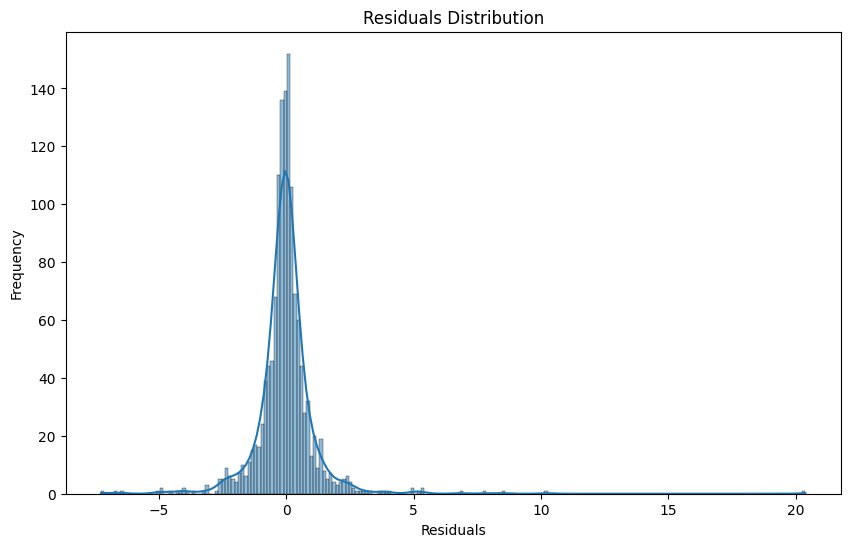

잔차의 평균: -0.0242
잔차의 분산: 1.5627


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 잔차 계산
residuals = y_test - y_pred

# 잔차 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 잔차의 평균과 분산 확인
print(f'잔차의 평균: {np.mean(residuals):.4f}')
print(f'잔차의 분산: {np.var(residuals):.4f}')


## 잔차 분석
'야구 데이터가 타율, OPS는 소수점으로 나타나고 다른 성적 지표들도 비교적 작은 범위의 자연수로 분포되어 있어서 결과가 좋게 나오는건 아닐까?' 라는 가설이 제기되어 이를 확인해보고자 잔차 분석을 실시했다.

In [ ]:
import matplotlib.pyplot as plt

# 피처 중요도 출력
feature_importances_with_std = best_model_rf.feature_importances_
features_with_std = X.columns

feature_importance_with_std_df = pd.DataFrame({'Feature': features_with_std, 'Importance': feature_importances_with_std})

print("\n표준편차 포함 모델 피처 중요도:")
print(feature_importance_with_std_df.sort_values(by='Importance', ascending=False))


표준편차 포함 모델 피처 중요도:
      Feature  Importance
3        WHIP    0.624221
4  평균자책점_표준편차    0.235125
0         피안타    0.029298
8   WHIP_표준편차    0.025863
2         탈삼진    0.019735
1         4사구    0.018302
7    탈삼진_표준편차    0.016001
6    4사구_표준편차    0.015944
5    피안타_표준편차    0.015511


투수 모델의 경우 WHIP(이닝별 주차 출루 허용 비율)을 많이 사용했음을 확인할 수 있었다.

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

# 데이터 로드
data = augmented_df

# 필요 없는 열 제거 (예: 'game_tag')
data = data.drop(columns=['player_id', 'game_tag'])

# 결측치 처리 (필요한 경우)
data = data.fillna(data.mean())

# 특성(X)와 타깃(y) 분리
X = data.drop(columns=['평균자책점'])
y = data['평균자책점']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 초기화 및 학습
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 모델 튜닝
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model_xgb = grid_search.best_estimator_

# 최적의 모델 평가
y_pred_best = best_model_xgb.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Best Mean Squared Error: {mse_best}')
print(f'Best R^2 Score: {r2_best}')

# 모델 저장
joblib.dump(best_model, 'best_model_xgb.pkl')


Mean Squared Error: 1.5474994239396078
R^2 Score: 0.9573235718705331
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Mean Squared Error: 1.2589076566023158
Best R^2 Score: 0.9652822603372284


['best_model_xgb.pkl']

XGBoost 모델 - R^2: 0.9573, MSE: 1.5475
XGBoost 모델 - Cross-Validation R^2: 0.9676


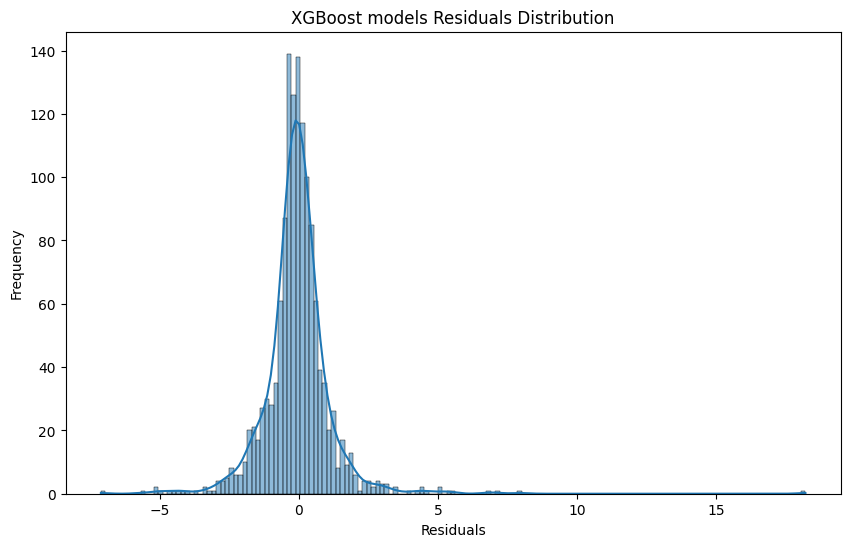

XGBoost 모델 잔차의 평균: -0.0529
XGBoost 모델 잔차의 분산: 1.5447


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost 모델
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# 교차 검증
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')

# 모델 훈련
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# 모델 평가
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'XGBoost 모델 - R^2: {r2_xgb:.4f}, MSE: {mse_xgb:.4f}')
print(f'XGBoost 모델 - Cross-Validation R^2: {cv_scores_xgb.mean():.4f}')

# 잔차 계산
residuals_xgb = y_test - y_pred_xgb

# 잔차 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True)
plt.title('XGBoost model''s Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 잔차의 평균과 분산 확인
print(f'XGBoost 모델 잔차의 평균: {np.mean(residuals_xgb):.4f}')
print(f'XGBoost 모델 잔차의 분산: {np.var(residuals_xgb):.4f}')


XGBoost 모델의 잔차 분석 결과는 위와 같았다. 전반적으로 평균이 0에 가깝고 그 분산도 적당했으나 그래프로 판단할 때 차이가 큰 값이 소량 존재하는 것으로 확인되었다.

In [ ]:
import matplotlib.pyplot as plt

# 피처 중요도 출력
feature_importances_with_std = best_model_xgb.feature_importances_
features_with_std = X.columns

feature_importance_with_std_df = pd.DataFrame({'Feature': features_with_std, 'Importance': feature_importances_with_std})

print("\n표준편차 포함 모델 피처 중요도:")
print(feature_importance_with_std_df.sort_values(by='Importance', ascending=False))


표준편차 포함 모델 피처 중요도:
      Feature  Importance
3        WHIP    0.489564
4  평균자책점_표준편차    0.355742
8   WHIP_표준편차    0.034181
7    탈삼진_표준편차    0.029395
5    피안타_표준편차    0.025088
6    4사구_표준편차    0.024128
0         피안타    0.018216
2         탈삼진    0.012961
1         4사구    0.010725


XGBoost의 경우도 whip을 주요한 피쳐로 활용했음을 알 수 있었다.

# LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# 데이터 로드
data = augmented_df

# 필요 없는 열 제거 (예: 'game_tag')
data = data.drop(columns=['game_tag', 'player_id'])

# 결측치 처리 (필요한 경우)
data = data.fillna(data.mean())

# 특성(X)와 타깃(y) 분리
X = data.drop(columns=['평균자책점'])
y = data['평균자책점']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 초기화 및 학습
model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 모델 튜닝
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model_lgb = grid_search.best_estimator_

# 최적의 모델 평가
y_pred_best = best_model_lgb.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Best Mean Squared Error: {mse_best}')
print(f'Best R^2 Score: {r2_best}')

# 모델 저장
joblib.dump(best_model, 'best_model_lgb.pkl')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2184
[LightGBM] [Info] Number of data points in the train set: 5436, number of used features: 9
[LightGBM] [Info] Start training from score 3.681200
Mean Squared Error: 2.586324431665214
R^2 Score: 0.9286751988272454
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2184
[LightGBM] [Info] Number of data points in the train set: 5436, number of used features: 9
[LightGBM] [Info] Start training from score 3.681200
Best Mean Squared Error: 1.4103718620296362
Best R^2 Score: 0.9611052304933981


['best_model_lgb.pkl']

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2187
[LightGBM] [Info] Number of data points in the train set: 5436, number of used features: 9
[LightGBM] [Info] Start training from score 3.639197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2187
[LightGBM] [Info] Number of data points in the train set: 5436, number of used features: 9
[LightGBM] [Info] Start training from score 3.649184
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2187
[LightGBM] [Info] Number of data points in the train set: 5436, number of used features: 9
[LightGBM] [Info] Start training 

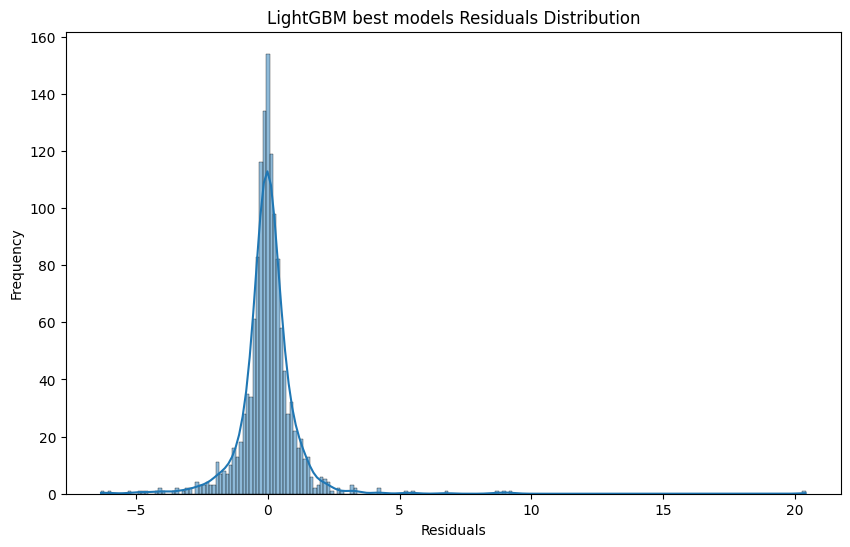

LightGBM 모델 잔차의 평균: -0.0015
LightGBM 모델 잔차의 분산: 1.4104


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LightGBM 모델
#lgb_model = lgb.LGBMRegressor(random_state=42)

# 교차 검증
cv_scores_lgb = cross_val_score(best_model_lgb, X, y, cv=5, scoring='r2')

# 모델 훈련
#lgb_model.fit(X_train, y_train)
y_pred_lgb = best_model_lgb.predict(X_test)

# 모델 평가
r2_lgb = r2_score(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)

print(f'LightGBM 모델 - R^2: {r2_lgb:.4f}, MSE: {mse_lgb:.4f}')
print(f'LightGBM 모델 - Cross-Validation R^2: {cv_scores_lgb.mean():.4f}')

# 잔차 계산
residuals_lgb = y_test - y_pred_lgb

# 잔차 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lgb, kde=True)
plt.title('LightGBM best model''s Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 잔차의 평균과 분산 확인
print(f'LightGBM 모델 잔차의 평균: {np.mean(residuals_lgb):.4f}')
print(f'LightGBM 모델 잔차의 분산: {np.var(residuals_lgb):.4f}')


LightGBM의 경우 학습 및 테스팅 성능은 가장 뛰어났다. 또한 잔차 플롯의 평균과 분산도 가장 낮았다. 다만 앞서 XGBoost와 유사하게, 잔차가 큰 값이 소량 존재하는 것으로 확인 되었다.

In [ ]:
import matplotlib.pyplot as plt

# 피처 중요도 출력
feature_importances_with_std = best_model_lgb.feature_importances_
features_with_std = X.columns

feature_importance_with_std_df = pd.DataFrame({'Feature': features_with_std, 'Importance': feature_importances_with_std})

print("\n표준편차 포함 모델 피처 중요도:")
print(feature_importance_with_std_df.sort_values(by='Importance', ascending=False))


표준편차 포함 모델 피처 중요도:
      Feature  Importance
3        WHIP        4216
2         탈삼진        3605
0         피안타        3219
1         4사구        3144
4  평균자책점_표준편차        3033
8   WHIP_표준편차        2392
6    4사구_표준편차        1700
5    피안타_표준편차        1596
7    탈삼진_표준편차        1595


LightGBM의 경우 WHIP과 탈삼진을 bin을 나누는데 자주 사용했음을 확인할 수 있었다.

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# 데이터 로드
data = augmented_df

# 필요 없는 열 제거 (예: 'game_tag')
data = data.drop(columns=['player_id', 'game_tag'])

# 결측치 처리 (필요한 경우)
data = data.fillna(data.mean())

# 특성(X)와 타깃(y) 분리
X = data.drop(columns=['평균자책점'])
y = data['평균자책점']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화 및 학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 모델 평가
y_pred = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 모델 저장
joblib.dump(model_lr, 'linear_regression_model.pkl')


Mean Squared Error: 11.778397389080487
R^2 Score: 0.6751792460279384


['linear_regression_model.pkl']

Linear Regression 모델 - R^2: 0.6752, MSE: 11.7784
Linear Regression 모델 - Cross-Validation R^2: 0.6907


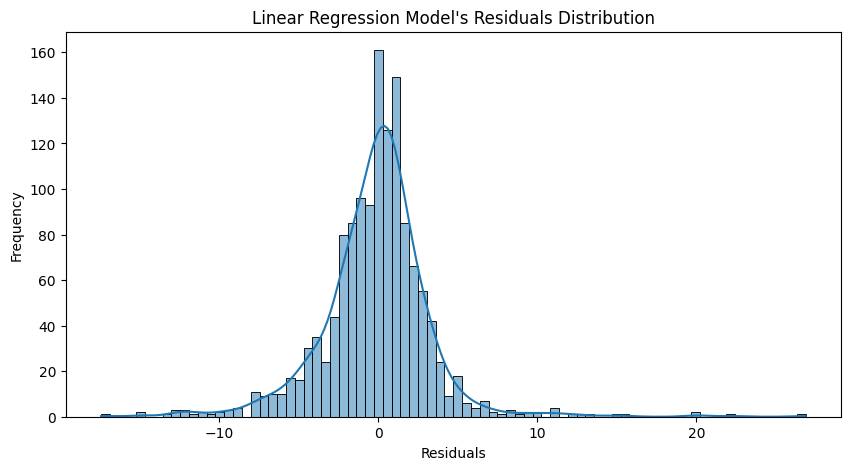

Linear Regression 모델 잔차의 평균: -0.1609
Linear Regression 모델 잔차의 분산: 11.7525


In [ ]:
# 선형 회귀 모델
#linear_model = LinearRegression()

# 교차 검증
cv_scores_linear = cross_val_score(model_lr, X, y, cv=5, scoring='r2')


# 모델 평가
r2_linear = r2_score(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)

print(f'Linear Regression 모델 - R^2: {r2_linear:.4f}, MSE: {mse_linear:.4f}')
print(f'Linear Regression 모델 - Cross-Validation R^2: {cv_scores_linear.mean():.4f}')

# 잔차 계산
residuals_linear = y_test - y_pred

# 잔차 분포 시각화
plt.figure(figsize=(10, 5))
sns.histplot(residuals_linear, kde=True)
plt.title("Linear Regression Model's Residuals Distribution")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 잔차의 평균과 분산 확인
print(f'Linear Regression 모델 잔차의 평균: {np.mean(residuals_linear):.4f}')
print(f'Linear Regression 모델 잔차의 분산: {np.var(residuals_linear):.4f}')


야수 모델에서도 그러했듯, 투수 모델에서도 선형 회귀는 성적 지표가 앙상블 기법에 비해서 떨어짐을 확인할 수 있었다. 따라서 선형 회귀는 야구 데이터의 비선형적 패턴을 적절히 학습하기에 어려움이 있다 판단할 수 있었다.

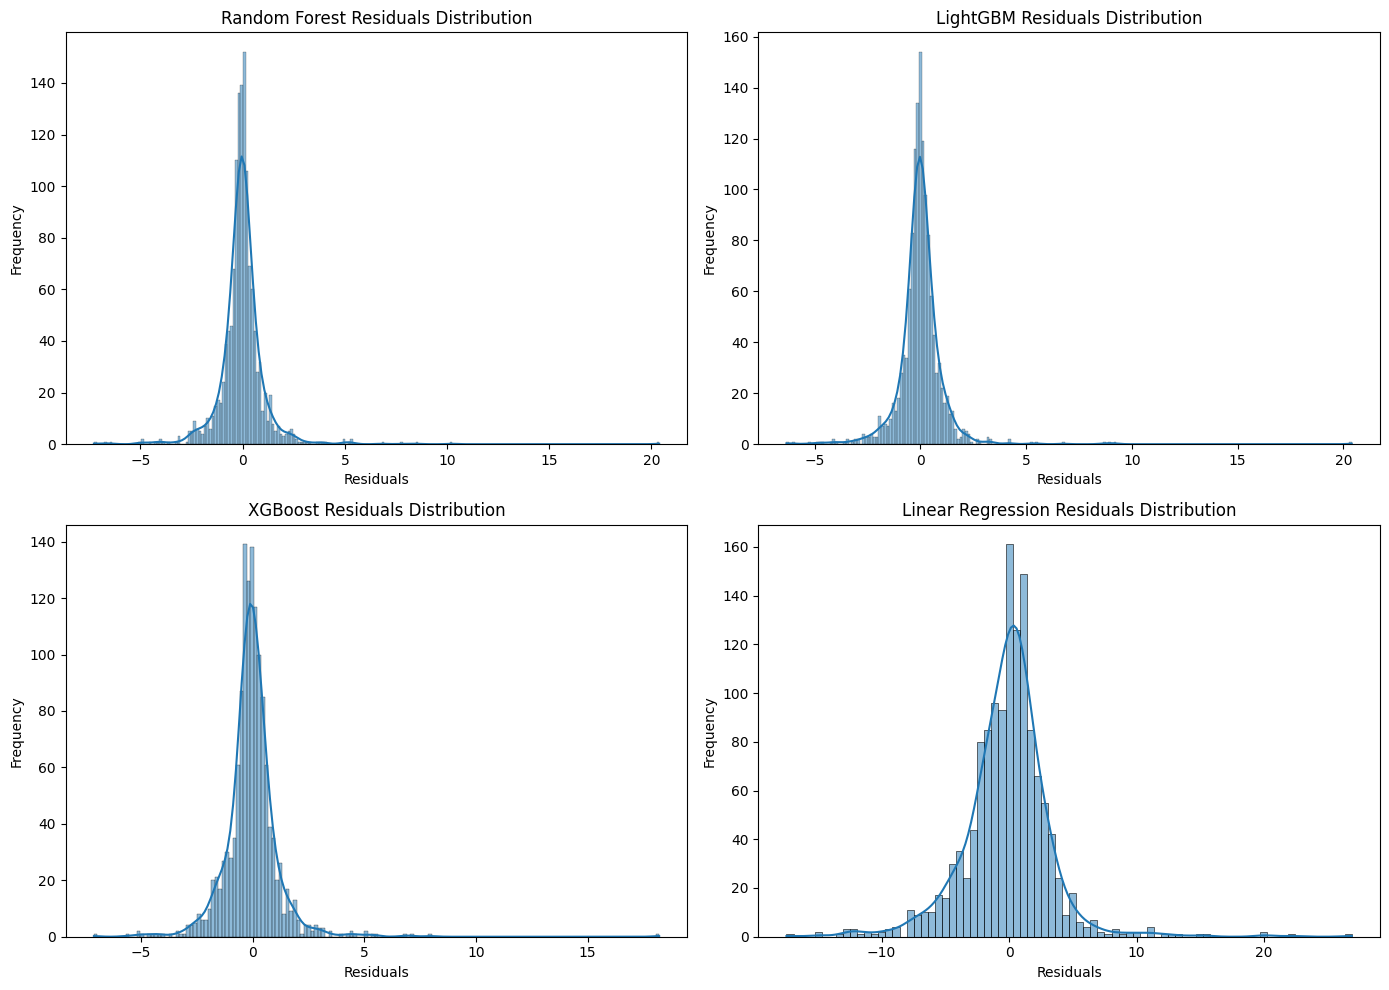

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2행 2열의 서브플롯 생성
models = ['Random Forest', 'LightGBM', 'XGBoost', 'Linear Regression']
residuals = [residuals, residuals_lgb, residuals_xgb, residuals_linear]

for i, ax in enumerate(axes.flat):
    sns.histplot(residuals[i], kde=True, ax=ax)
    ax.set_title(f'{models[i]} Residuals Distribution')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 테스트 섹션


In [ ]:
import pandas as pd

# 엑셀 파일 불러오기
data = pd.read_excel("/content/2022 KBO 신인 드래프트.xlsx", sheet_name = "테스트용_최준호")

# 데이터 확인
data.head(10)

,player_id,game_tag,평균자책점,경기수,승,패,이닝,타자,피안타,피홈런,4사구,탈삼진,실점,자책점,승률,WHIP,키,몸무게
0,1,2022년_통산,1.50,22,3,2,54.0,217,29,1,16,69,15,9,0.6,0.83,188,90
1,1,이마트배,0.00,5,1,0,15.0,48,2,0,2,18,0,0,1.0,0.20,188,90
2,1,주말리그_전반기,4.50,2,0,0,6.1,27,6,1,2,8,3,3,0.0,1.33,188,90
3,1,황금사자기,0.00,4,0,0,6.1,25,3,0,0,9,2,0,0.0,0.67,188,90
4,1,주말리그_후반기,0.00,3,0,0,3.2,10,0,0,0,3,0,0,0.0,0.00,188,90
5,1,대통령배,6.75,1,0,1,3.2,17,7,0,0,3,3,3,0.0,2.00,188,90
6,1,봉황대기,1.93,5,2,0,14.1,68,8,0,10,22,6,3,1.0,1.29,188,90
7,1,전국체육대회,0.00,2,0,1,4.2,22,3,0,2,6,1,0,0.0,0.80,188,90


In [ ]:
# 필요한 열 선택 (예: player_id, game_id, 성적 지표 등)
data_without_first_row = data.iloc[1:]
data = data[['player_id', '평균자책점', '피안타', '4사구', '탈삼진', 'WHIP', '키', '몸무게']]

# 필요한 열 선택 (예: player_id, game_tag, 성적 지표 등)
data_selected = data_without_first_row[['player_id', '평균자책점', '피안타', '4사구', '탈삼진', 'WHIP', '키', '몸무게']]

# 선수별로 그룹화하여 표준편차 계산
player_stats_std = data_selected.groupby('player_id').agg({
    '평균자책점': 'std',
    '피안타': 'std',
    '4사구': 'std',
    '탈삼진': 'std',
    'WHIP': 'std',
}).reset_index()

# 컬럼 이름 변경
player_stats_std.columns = ['player_id', '평균자책점_표준편차', '피안타_표준편차', '4사구_표준편차', '탈삼진_표준편차', 'WHIP_표준편차']

# 결과 확인
print(player_stats_std)


   player_id  평균자책점_표준편차  피안타_표준편차  4사구_표준편차  탈삼진_표준편차  WHIP_표준편차
0          1     2.73012   2.91139  3.545621  7.380799   0.696406


In [ ]:
data_merged = pd.merge(data, player_stats_std, on='player_id', how='left')
print(data_merged)

   player_id  평균자책점  피안타  4사구  탈삼진  WHIP    키  몸무게  평균자책점_표준편차  피안타_표준편차  \
0          1   1.50   29   16   69  0.83  188   90     2.73012   2.91139   
1          1   0.00    2    2   18  0.20  188   90     2.73012   2.91139   
2          1   4.50    6    2    8  1.33  188   90     2.73012   2.91139   
3          1   0.00    3    0    9  0.67  188   90     2.73012   2.91139   
4          1   0.00    0    0    3  0.00  188   90     2.73012   2.91139   
5          1   6.75    7    0    3  2.00  188   90     2.73012   2.91139   
6          1   1.93    8   10   22  1.29  188   90     2.73012   2.91139   
7          1   0.00    3    2    6  0.80  188   90     2.73012   2.91139   

   4사구_표준편차  탈삼진_표준편차  WHIP_표준편차  
0  3.545621  7.380799   0.696406  
1  3.545621  7.380799   0.696406  
2  3.545621  7.380799   0.696406  
3  3.545621  7.380799   0.696406  
4  3.545621  7.380799   0.696406  
5  3.545621  7.380799   0.696406  
6  3.545621  7.380799   0.696406  
7  3.545621  7.380799   0.696406  


In [ ]:
new_data = data_merged.head(1)
new_data = new_data.drop(columns = ['평균자책점'])
print(new_data)

   player_id  피안타  4사구  탈삼진  WHIP    키  몸무게  평균자책점_표준편차  피안타_표준편차  4사구_표준편차  \
0          1   29   16   69  0.83  188   90     2.73012   2.91139  3.545621   

   탈삼진_표준편차  WHIP_표준편차  
0  7.380799   0.696406  


In [ ]:
import joblib

# 저장된 모델 불러오기
model = joblib.load('best_model.pkl')

# 새로운 데이터 예측
prediction = model.predict(new_data)

print(f'Predicted 평균자책점: {prediction[0]}')

Predicted 평균자책점: 1.040817504497803


위는 직접 테스트를 해본 결과이다.
특정 선수의 1~2학년 데이터를 모아서 입력하면 그 선수의 성적 표준편차를 계산하고 이를 모델에 입력해 예상 평균자책점값을 출력받는다.